In [ ]:
!git clone https://github.com/RajamannarAanjaram/EVA-6.git

In [ ]:
!pip install -U albumentations
!pip install -U torchsummary
!pip install -U grad-cam
!pip install -U ttach

In [ ]:
%cd EVA-6/
!ls

In [1]:
from utils.DataLoader import Loader,mean_std,DeNorm
from src.models import *
from src.optimise import *
from src.plots import Plots
import matplotlib.pyplot as plt
from utils.helper import get_mean_std

from pytorch_grad_cam import GradCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

# import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
loader = Loader(batch_size=128)
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=False)



======> Computing mean and std of dataset
Files already downloaded and verified


100%|██████████| 390/390 [00:07<00:00, 51.24it/s]


Files already downloaded and verified
Files already downloaded and verified


In [3]:
model, summary = ModelLoader.modelsummary(version=[2,2,2,2],inputsize=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [4]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [5]:
(train_acc, train_losses, test_acc, test_losses), modelfinal = learner(model,train_data,test_data,20,device)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1:


Loss=1.5060902833938599 Batch_id=390 Accuracy=27.50: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]
Loss=1.8388605117797852 Batch_id=0 Accuracy=33.59:   0%|          | 1/391 [00:00<00:58,  6.62it/s]


Test set: Average loss: 1.7620, Accuracy: 17004/50000 (34.01%)

Epoch 2:


Loss=1.4507976770401 Batch_id=390 Accuracy=43.60: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]   
Loss=1.3740301132202148 Batch_id=0 Accuracy=48.44:   0%|          | 1/391 [00:00<00:58,  6.65it/s]


Test set: Average loss: 1.3357, Accuracy: 25723/50000 (51.45%)

Epoch 3:


Loss=1.3712096214294434 Batch_id=390 Accuracy=53.05: 100%|██████████| 391/391 [00:58<00:00,  6.73it/s]
Loss=1.4211981296539307 Batch_id=0 Accuracy=49.22:   0%|          | 1/391 [00:00<00:58,  6.66it/s]


Test set: Average loss: 1.0827, Accuracy: 30405/50000 (60.81%)

Epoch 4:


Loss=1.069259524345398 Batch_id=390 Accuracy=59.21: 100%|██████████| 391/391 [00:58<00:00,  6.74it/s] 
Loss=1.0573186874389648 Batch_id=0 Accuracy=60.94:   0%|          | 1/391 [00:00<00:58,  6.71it/s]


Test set: Average loss: 0.9215, Accuracy: 33814/50000 (67.63%)

Epoch 5:


Loss=1.050398588180542 Batch_id=390 Accuracy=64.01: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s] 
Loss=0.925881564617157 Batch_id=0 Accuracy=64.84:   0%|          | 1/391 [00:00<00:58,  6.61it/s]


Test set: Average loss: 0.8049, Accuracy: 35671/50000 (71.34%)

Epoch 6:


Loss=1.098944902420044 Batch_id=390 Accuracy=67.44: 100%|██████████| 391/391 [00:57<00:00,  6.74it/s] 
Loss=0.8504273295402527 Batch_id=0 Accuracy=69.53:   0%|          | 1/391 [00:00<00:58,  6.69it/s]


Test set: Average loss: 0.6887, Accuracy: 37933/50000 (75.87%)

Epoch 7:


Loss=0.6248129606246948 Batch_id=390 Accuracy=70.54: 100%|██████████| 391/391 [00:57<00:00,  6.75it/s]
Loss=0.8472342491149902 Batch_id=0 Accuracy=70.31:   0%|          | 1/391 [00:00<00:58,  6.72it/s]


Test set: Average loss: 0.6402, Accuracy: 38896/50000 (77.79%)

Epoch 8:


Loss=0.8417841792106628 Batch_id=390 Accuracy=72.83: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
Loss=0.7118629813194275 Batch_id=0 Accuracy=79.69:   0%|          | 1/391 [00:00<00:58,  6.71it/s]


Test set: Average loss: 0.5320, Accuracy: 40770/50000 (81.54%)

Epoch 9:


Loss=0.6177820563316345 Batch_id=390 Accuracy=75.10: 100%|██████████| 391/391 [00:57<00:00,  6.76it/s]
Loss=0.844325602054596 Batch_id=0 Accuracy=71.88:   0%|          | 1/391 [00:00<00:58,  6.72it/s]


Test set: Average loss: 0.5056, Accuracy: 41240/50000 (82.48%)

Epoch 10:


Loss=0.8635494112968445 Batch_id=390 Accuracy=76.66: 100%|██████████| 391/391 [00:57<00:00,  6.76it/s] 
Loss=0.6396886706352234 Batch_id=0 Accuracy=76.56:   0%|          | 1/391 [00:00<00:58,  6.69it/s]


Test set: Average loss: 0.4417, Accuracy: 42342/50000 (84.68%)

Epoch 11:


Loss=0.6057133078575134 Batch_id=390 Accuracy=78.32: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s] 
Loss=0.5820275545120239 Batch_id=0 Accuracy=80.47:   0%|          | 1/391 [00:00<00:58,  6.72it/s]


Test set: Average loss: 0.3964, Accuracy: 43141/50000 (86.28%)

Epoch 12:


Loss=0.41125553846359253 Batch_id=390 Accuracy=79.21: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s]
Loss=0.5356476306915283 Batch_id=0 Accuracy=80.47:   0%|          | 1/391 [00:00<00:58,  6.70it/s]


Test set: Average loss: 0.3345, Accuracy: 44286/50000 (88.57%)

Epoch 13:


Loss=0.590141773223877 Batch_id=390 Accuracy=80.25: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s]  
Loss=0.4450801908969879 Batch_id=0 Accuracy=85.16:   0%|          | 1/391 [00:00<00:57,  6.75it/s]


Test set: Average loss: 0.3113, Accuracy: 44625/50000 (89.25%)

Epoch 14:


Loss=0.5450533628463745 Batch_id=390 Accuracy=81.17: 100%|██████████| 391/391 [00:57<00:00,  6.77it/s] 
Loss=0.5929409861564636 Batch_id=0 Accuracy=78.12:   0%|          | 1/391 [00:00<00:58,  6.70it/s]


Test set: Average loss: 0.3088, Accuracy: 44698/50000 (89.40%)

Epoch 15:


Loss=0.5531027913093567 Batch_id=390 Accuracy=82.13: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s] 
Loss=0.44687598943710327 Batch_id=0 Accuracy=89.06:   0%|          | 1/391 [00:00<00:58,  6.67it/s]


Test set: Average loss: 0.2658, Accuracy: 45478/50000 (90.96%)

Epoch 16:


Loss=0.5482415556907654 Batch_id=390 Accuracy=82.96: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s] 
Loss=0.501781165599823 Batch_id=0 Accuracy=82.03:   0%|          | 1/391 [00:00<00:58,  6.72it/s]


Test set: Average loss: 0.2625, Accuracy: 45437/50000 (90.87%)

Epoch 17:


Loss=0.44712957739830017 Batch_id=390 Accuracy=83.36: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s]
Loss=0.44839292764663696 Batch_id=0 Accuracy=84.38:   0%|          | 1/391 [00:00<00:57,  6.80it/s]


Test set: Average loss: 0.2188, Accuracy: 46296/50000 (92.59%)

Epoch 18:


Loss=0.6296302676200867 Batch_id=390 Accuracy=84.26: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s] 
Loss=0.396736204624176 Batch_id=0 Accuracy=87.50:   0%|          | 1/391 [00:00<00:57,  6.76it/s]


Test set: Average loss: 0.2156, Accuracy: 46263/50000 (92.53%)

Epoch 19:


Loss=0.6211144924163818 Batch_id=390 Accuracy=84.79: 100%|██████████| 391/391 [00:57<00:00,  6.76it/s] 
Loss=0.4549868702888489 Batch_id=0 Accuracy=83.59:   0%|          | 1/391 [00:00<00:58,  6.72it/s]


Test set: Average loss: 0.2319, Accuracy: 45942/50000 (91.88%)

Epoch 20:


Loss=0.3475675880908966 Batch_id=390 Accuracy=85.35: 100%|██████████| 391/391 [00:57<00:00,  6.78it/s] 



Test set: Average loss: 0.1701, Accuracy: 47231/50000 (94.46%)



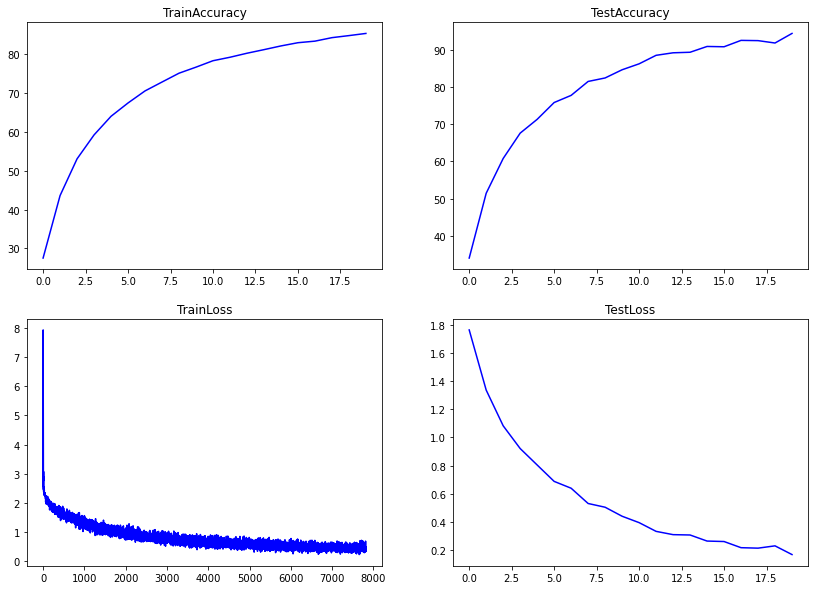

In [6]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)

## Misclassified Examples Visualisations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 2769


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

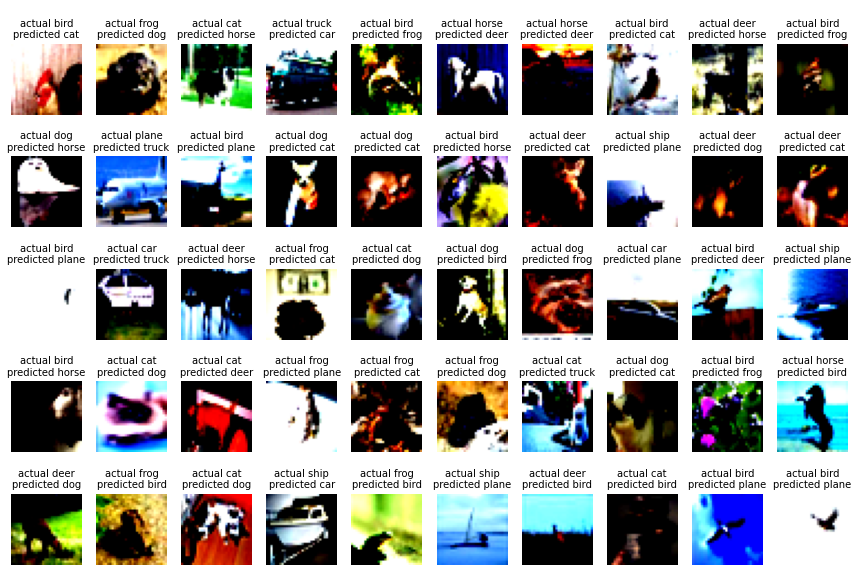

In [7]:
Plots.miscImages(modelfinal,test_data,device)
plt.show()

## Class-Level Accuracy

In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images["image"].to(device)
        labels = labels.to(device)
        outputs = modelfinal(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 97 %
Accuracy of   car : 98 %
Accuracy of  bird : 91 %
Accuracy of   cat : 87 %
Accuracy of  deer : 93 %
Accuracy of   dog : 91 %
Accuracy of  frog : 95 %
Accuracy of horse : 94 %
Accuracy of  ship : 92 %
Accuracy of truck : 98 %


## CAM Visualisation

In [9]:
# using layer 3 as it's 8x8 in width & height
target_layer = model.layer3[-1]

# Construct the CAM object once, and then re-use it on many images:
cam =  XGradCAM(model=model, target_layer=target_layer, use_cuda=device)
denorm = DeNorm()



======> Computing mean and std of dataset
Files already downloaded and verified


100%|██████████| 390/390 [00:04<00:00, 83.25it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


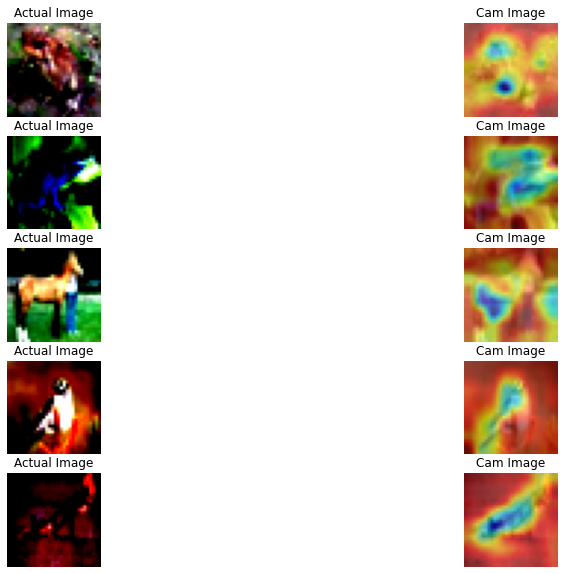

In [10]:
Plots.plot_grad_cam(cam,images[:5],None,denorm)
# result 